If you were not here for Lab 12, and need to install the graphviz package:

In [ ]:
!pip install --user graphviz

# Lab 13 - Decision Trees for regression

For this lab, we will return to the insurance data from Labs 7 and 8.  Recall we are trying to predict the insurance cost, a quantitative value.  

If you don't have the dataset, download it from GitHub: [https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In this data, each row represents an insurance policy and the 7 columns contain the following information about it:
- age: age of policy holder
- sex: sex of policy holder
- bmi: boday mass index (bmi) of policy holder.  bmi is a (sometimes unreliable) measurement of body fat in adults
- children: number of children (dependents) on the policy
- smoker: whether the policy holder is a smoker
- region: region of the country the policy holder lives in
- charges: price for insurance policy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

Read the data into a dataframe and display it to make sure it was read in correctly:

In [7]:
insurance = pd.read_csv("insurance.txt")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Sci-kit learn decision trees require numeric data.  How can we convert the categorical columns into numeric data?  
Hint:  see Lab 8

In [8]:
insurance = pd.get_dummies(insurance, columns = ["sex", "smoker", "region"])
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


## Fitting a decision tree with sci-kit learn

We can get just the independent variables (x's) using the following:

In [9]:
X = insurance.iloc[:,[0,1,2,4,5,6,7,8]]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast
0,19,27.900,0,1,0,0,1,0
1,18,33.770,1,0,1,1,0,0
2,28,33.000,3,0,1,1,0,0
3,33,22.705,0,0,1,1,0,0
4,32,28.880,0,0,1,1,0,0


Next we created the decision tree variable (object) and then fit it to our data:

In [10]:
reg = tree.DecisionTreeRegressor(max_depth = 5)
reg = reg.fit(X, insurance["charges"])

If you are running Jupyter Hub on your own computer, you may be able to display the decision tree by:

[Text(166.70250000000001, 199.32, 'X[5] <= 0.5\nentropy = 146542766.494\nsamples = 1338\nvalue = 13270.422'),
 Text(87.885, 163.07999999999998, 'X[1] <= 30.01\nentropy = 132721153.136\nsamples = 274\nvalue = 32050.232'),
 Text(44.64, 126.83999999999999, 'X[0] <= 41.0\nentropy = 25281960.654\nsamples = 130\nvalue = 21369.223'),
 Text(22.32, 90.6, 'X[0] <= 29.5\nentropy = 12049437.126\nsamples = 73\nvalue = 18474.022'),
 Text(11.16, 54.359999999999985, 'X[1] <= 28.495\nentropy = 12673222.306\nsamples = 41\nvalue = 17373.665'),
 Text(5.58, 18.119999999999976, 'entropy = 5209187.378\nsamples = 34\nvalue = 16674.483'),
 Text(16.740000000000002, 18.119999999999976, 'entropy = 35019677.873\nsamples = 7\nvalue = 20769.69'),
 Text(33.480000000000004, 54.359999999999985, 'X[1] <= 18.032\nentropy = 7711265.211\nsamples = 32\nvalue = 19883.854'),
 Text(27.9, 18.119999999999976, 'entropy = 0.0\nsamples = 1\nvalue = 32734.186'),
 Text(39.06, 18.119999999999976, 'entropy = 2461375.846\nsamples = 31\n

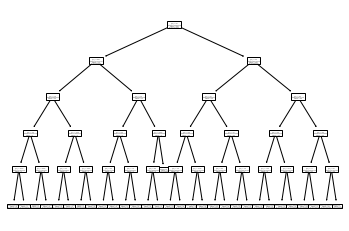

In [11]:
tree.plot_tree(reg)

If you are using the Jupyter Hub server, run the following code (which will give an error):

In [ ]:
dot_data = tree.export_graphviz(reg, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("insurance.dot")

However, despite the error, there should now be a file called happiness.dot in your directory.  To view the fitted decision tree, open the happiness.dot file in Jupyter and copy the text.  Paste this text into the text box at [http://www.webgraphviz.com](http://www.webgraphviz.com) and click the "Generate graph!" button at the bottom.

The column names have been replaced by `X[0], X[1], ..., X[7]`.  Run the following code to change `X[0], X[1], ..., X[7]` to the column names in insurance.dot.

In [ ]:
with open ("insurance.dot", "r") as fin:
    with open("insurance_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","age")
            line = line.replace("X[1]","bmi")
            line = line.replace("X[2]","children")
            line = line.replace("X[3]","sex_male")
            line = line.replace("X[4]","smoker_yes")
            line = line.replace("X[5]","region_northwest")            
            line = line.replace("X[4]","region_southeast")
            line = line.replace("X[5]","region_southwest")
            fout.write(line)

Copy the contents of insurance_fixed.dot into the textbox in [http://www.webgraphviz.com](http://www.webgraphviz.com) to display the decision tree with the column names.  How does it compare the the decision tree you made?

What happens if you change the `max_depth` parameter to 5 in DecisionTreeRegressor?

Look at the leaves of your new tree.  What's the smallest sample?  

A few of the leaves only have 1 sample.  How do you think this tree would work on other insurance data?

The single samples are a sign of over-fitting, and to fix it we can make `max_depth` smaller (but too small and our model will not be as good as it could be).

### Testing and training data

To figure out what `max_depth` should be, let's split our data into training and testing data. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, insurance["charges"], test_size = 0.2)

Create a decision tree with `max_depth = 3` from the training data:

In [16]:
reg1 = tree.DecisionTreeRegressor(max_depth = 3)
reg1 = reg1.fit(X_train, y_train)

Make predictions for the test data:

In [17]:
predictions1 = reg1.predict(X_test)

Compute the mean squared error for these predictions:

In [23]:
import math
mse1 = ((y_test - predictions1)**2).mean()
print(mse1)

rmse1 = math.sqrt(mse1)
print(rmse1)

20080596.291950904
4481.137834518249


What is the mean squared error if you use `max_depth = 4`?

In [27]:
reg2 = tree.DecisionTreeRegressor(max_depth = 4)
reg2 = reg2.fit(X, insurance["charges"])

predictions2 = reg2.predict(X_test)

mse2 = ((y_test - predictions2)**2).mean()
print(mse2)

rmse2 = math.sqrt(mse2)
print(rmse2)

16851873.931218345
4105.10340079496


What is the mean squared error if you use `max_depth = 5`?

In [29]:
reg3 = tree.DecisionTreeRegressor(max_depth = 5)
reg3 = reg3.fit(X, insurance["charges"])

predictions3 = reg3.predict(X_test)

mse3 = ((y_test - predictions3)**2).mean()
print(mse3)

rmse3 = math.sqrt(mse3)
print(rmse3)

13962075.807870118
3736.586116747494


What about if you use `max_depth = 2`?

In [30]:
reg4 = tree.DecisionTreeRegressor(max_depth = 2)
reg4 = reg4.fit(X, insurance["charges"])

predictions4 = reg4.predict(X_test)

mse4 = ((y_test - predictions4)**2).mean()
print(mse4)

rmse4 = math.sqrt(mse4)
print(rmse4)

23331004.26281238
4830.217827677379


Which `max_depth` parameter should you use?  What is the corresponding decision tree?

__`max_depth` = 5 because it has the lowest RMSE.__

You can also use a loop to quickly check the different parameter values for `max_depth`.  

In [ ]:
dot_data = tree.export_graphviz(reg_depth3, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("insurance_depth3.dot")

In [ ]:
with open ("insurance_depth3.dot", "r") as fin:
    with open("insurance_depth3_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","age")
            line = line.replace("X[1]","bmi")
            line = line.replace("X[2]","children")
            line = line.replace("X[3]","sex_male")
            line = line.replace("X[4]","smoker_yes")
            line = line.replace("X[5]","region_northwest")            
            line = line.replace("X[4]","region_southeast")
            line = line.replace("X[5]","region_southwest")
            fout.write(line)

Finally, we can compare the mean squared error using a Decision Tree regressor to the mean squared error computed using linear regression in Lab 8, also based on a training/testing split of 0.2.  It was 41142821.67547247 (for my training/testing data).

Which model is better?

__The decision tree classification model is better.__

Return to the decision tree classifier from last lab.  Which `max_depth` is best?